In [29]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

print (tf.__version__)

2.8.0


In [30]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_img, train_lbl), (tst_img, tst_lbl) = fashion_mnist.load_data()

In [53]:
class_names = ['T-shirt', 'trouser', 'hoodie', 'dress', 'coat', 
               'sandal', 'shirt', 'sneaker', 'bag', 'hightop AIRFORE']

In [54]:
train_img.shape

(60000, 28, 28)

In [55]:
len(train_lbl)

60000

In [56]:
train_lbl

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [57]:
tst_img.shape

(10000, 28, 28)

In [58]:
len(tst_lbl)

10000

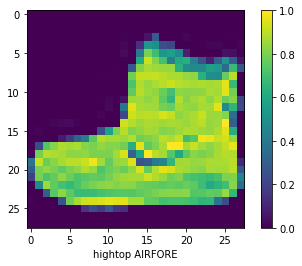

In [59]:
plt.figure()
plt.imshow(train_img[0])
plt.colorbar()
plt.grid(False)
plt.xlabel(class_names[train_lbl[0]])
plt.show()

In [60]:
train_img = train_img / 255.0
tst_img = tst_img / 255.0

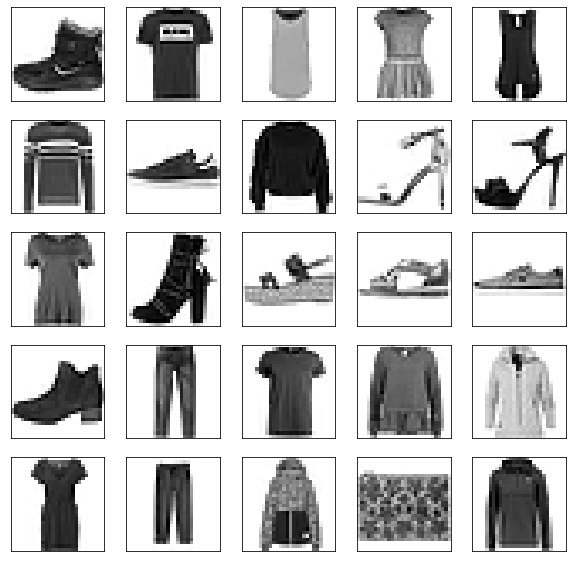

In [61]:
plt.figure(figsize = (10,10))
for i in range(25):
    ax = plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_img[i], cmap = plt.cm.binary)
    plt.xlabel(class_names[train_lbl[i]])
    ax.xaxis.label.set_color('white')
plt.show()